<a href="https://colab.research.google.com/github/hrd1409/Image-processing/blob/main/Popularity_based_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
movie=pd.read_csv('/content/movies.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movie.shape

(9125, 3)

In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB


In [5]:
rating=pd.read_csv('/content/ratings.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
rating.shape

(100004, 4)

In [7]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
rating.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


Merging movie and rating dataset for further recommendation process

In [11]:
data=pd.merge(rating,movie,on='movieId')
data.head()


,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


Using groupby for checking ratings and count for checking most popular movies.

In [13]:
data.groupby('title')['rating'].count().sort_values(ascending=False).reset_index().head(10)

,title,rating
0,Forrest Gump (1994),341
1,Pulp Fiction (1994),324
2,"Shawshank Redemption, The (1994)",311
3,"Silence of the Lambs, The (1991)",304
4,Star Wars: Episode IV - A New Hope (1977),291
5,Jurassic Park (1993),274
6,"Matrix, The (1999)",259
7,Toy Story (1995),247
8,Schindler's List (1993),244
9,Terminator 2: Judgment Day (1991),237


In [14]:
ratings_mean_count = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings_mean_count

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000
...,...
xXx (2002),2.478261
xXx: State of the Union (2005),1.000000
¡Three Amigos! (1986),3.258065


In [15]:
ratings_mean_count['rating_counts'] = pd.DataFrame(data.groupby('title')['rating'].count())

In [16]:
ratings_mean_count.head()

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


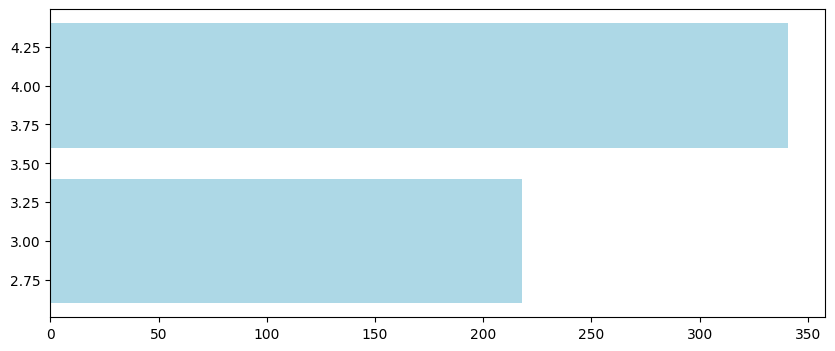

In [22]:
plt.figure(figsize =(10, 4))
ax=plt.barh(ratings_mean_count['rating'].round(),ratings_mean_count['rating_counts'],color='lightblue')
plt.show()

This are movies with higher rating and more number of rating by individuals. By understanding data we can say that movies having rating above 3 is considered as popular.

In [19]:
ratings_mean_count = ratings_mean_count[(ratings_mean_count['rating'] > 3) & (ratings_mean_count['rating_counts'] > 100)]
ratings_mean_count

,rating,rating_counts
title,,
2001: A Space Odyssey (1968),3.886179,123
Airplane! (1980),3.820755,106
Aladdin (1992),3.674419,215
Alien (1979),3.988189,127
Aliens (1986),3.924000,125
...,...,...
While You Were Sleeping (1995),3.440594,101
Who Framed Roger Rabbit? (1988),3.666667,108
Willy Wonka & the Chocolate Factory (1971),3.753378,148


As we have seen Netflix which have shows Top 10 Movies in India or any other country based on popularity recommendation which is based on ratings by individual not based on personal intrest or prefernce.

In [21]:
ratings_mean_count.sort_values(by='rating',ascending=False).reset_index().head(10)

,title,rating,rating_counts
0,"Godfather, The (1972)",4.487500,200
1,"Shawshank Redemption, The (1994)",4.487138,311
2,"Godfather: Part II, The (1974)",4.385185,135
3,"Usual Suspects, The (1995)",4.370647,201
4,Schindler's List (1993),4.303279,244
5,One Flew Over the Cuckoo's Nest (1975),4.256944,144
6,Fargo (1996),4.256696,224
7,Pulp Fiction (1994),4.256173,324
8,American Beauty (1999),4.236364,220
9,"Dark Knight, The (2008)",4.235537,121
